In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('bank-full.csv', sep = ';')

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
# SUMMARY OF THE DATA

df.shape

# 45211 customer calls and 17 features including the target variable y 
# This is a classification problem where we are predicting whether the customer will take the term deposit or not

(45211, 17)

# EXPLORATORY DATA ANALYSIS

In [15]:
datasum = pd.DataFrame(df.dtypes)
# identify missing values of the 11 columns,add the stats to the datadict
datasum['NullValues'] = df.isnull().sum()

# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datasum['NUnique']=df.nunique()
datasum['Count']=df.count()
datasum = datasum.rename(columns={0:'DataType'})
datasum

# INSIGHTS

# 1. There are 10 categorical and 7 object columns
# 2. There are no null values in the dataset
# 3. There are two target values yes or no

,DataType,NullValues,NUnique,Count
age,int64,0,77,45211
job,object,0,12,45211
marital,object,0,3,45211
education,object,0,4,45211
default,object,0,2,45211
balance,int64,0,7168,45211
housing,object,0,2,45211
loan,object,0,2,45211
contact,object,0,3,45211
day,int64,0,31,45211


In [18]:
# NULL DATA 

df.isnull().sum()

# There are no null values to be handled

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [19]:
# DUPLICATE VALUES
df.duplicated().sum()


# There are no duplicate values in the data

0

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [26]:
df['balance'].value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

# UNIVARIATE ANALYSIS


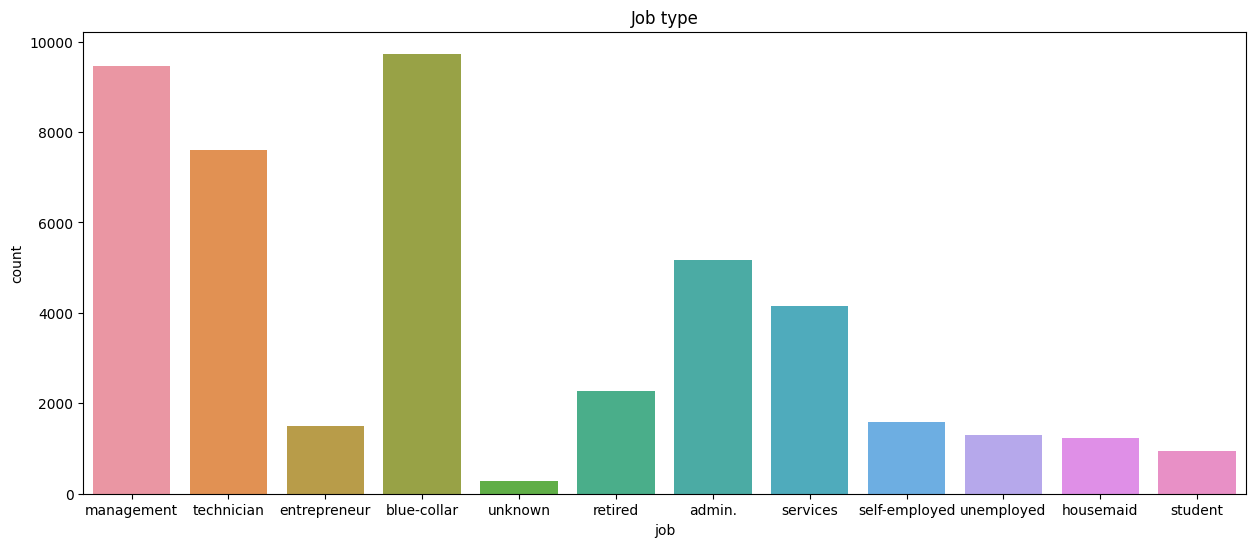

In [40]:
# JOB COUNT AND JOB VS TARGET
plt.figure(figsize= (15,6))
sns.countplot(x = 'job', data = df)
plt.title('Job type')
plt.show()


# INSIGHTS

# 1. The largest component of jobs are those in Blue collar, Management and Technician jobs
# 2. Very few customers are studends, housemaid and enterpreneurs

In [70]:

df.groupby(['y', 'job'])['y'].count().unstack().plot(kind = 'bar')
plt.show()


# Insights

# 1. Customers in the Blue collar, Managements, Admin and Technician jobs are the ones who majorly said no
# to the term deposit scheme
# 2.Customers who worked in management said yes mostly to the term deposit scheme followed by technicians

SyntaxError: invalid syntax (1507118269.py, line 8)

In [71]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

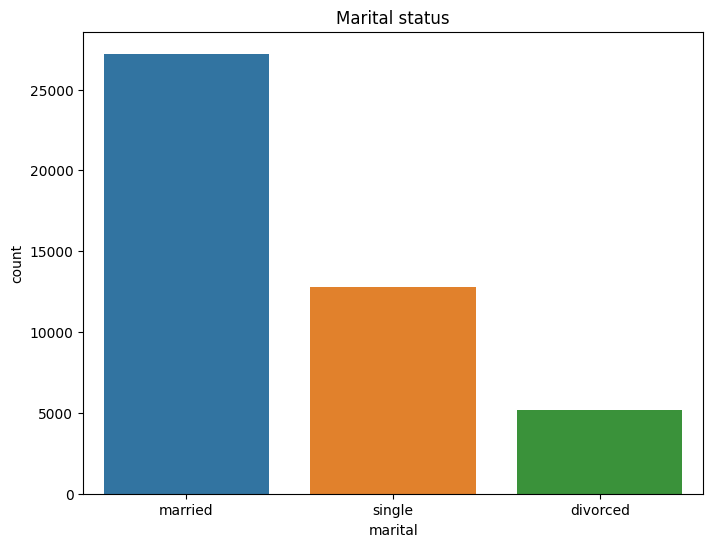

In [75]:
# MARITAL STATUS COUNT AND MARITAL STATUS VS TARGET
plt.figure(figsize= (8,6))
sns.countplot(x = 'marital', data = df)
plt.title('Marital status')
plt.show()


# INSIGHTS

# 1. Most of the customers were married, and least were divorced

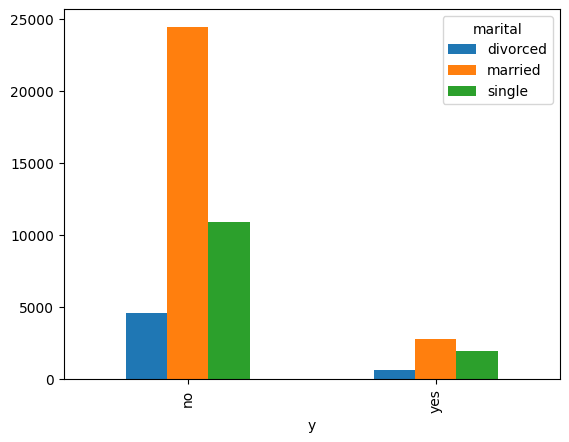

In [77]:

df.groupby(['y', 'marital'])['y'].count().unstack().plot(kind = 'bar')
plt.show()


# INSIGHTS

# 1.Married category said yes the most to the deposit schemes 
# 2. The trend of opting in to the deposits follows the count distribution of each marital status


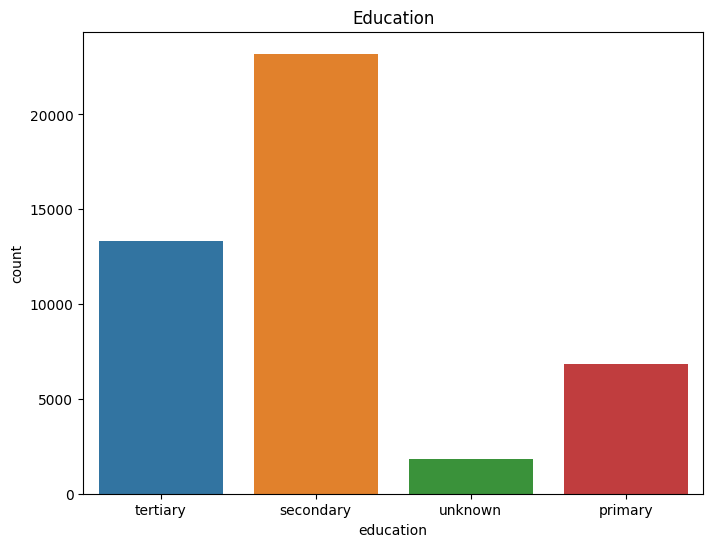

In [78]:
# EDUCATION COUNT AND TARGET DISTRIBUTION

plt.figure(figsize= (8,6))
sns.countplot(x = 'education', data = df)
plt.title('Education')
plt.show()


# INSIGHTS
# 1. Majority of customers have completed Secondary education
# 2. Followed by customes who have completed Teritary education
# 3. A good bunch of customers have completed only primary education

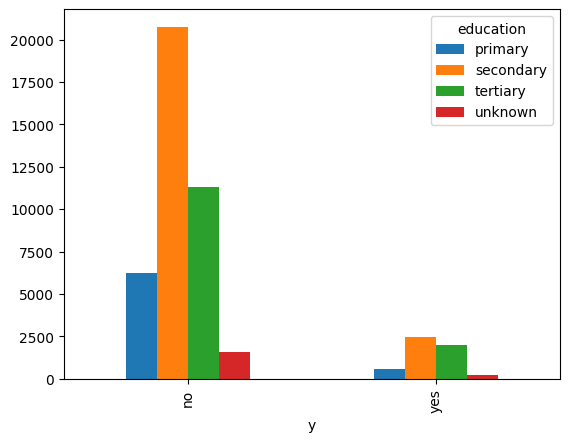

In [79]:
df.groupby(['y', 'education'])['y'].count().unstack().plot(kind = 'bar')
plt.show()


# INSIGHTS
# 1. This follows the same trend as of count

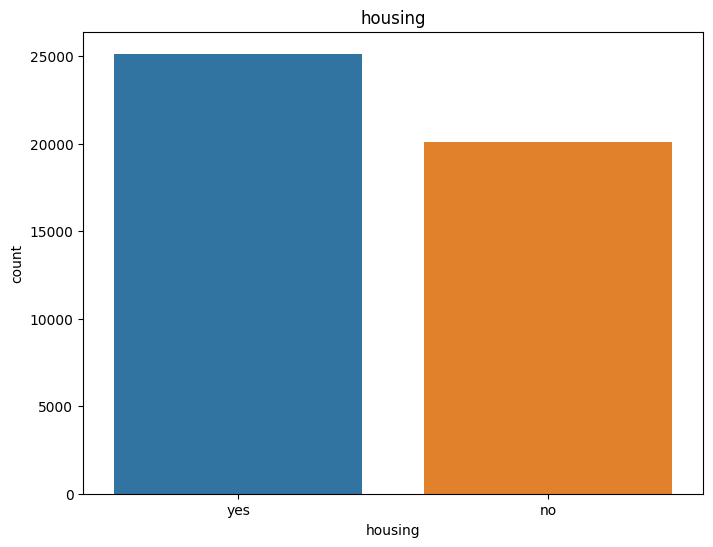

In [80]:
# HOUSING COUNT AND TARGET DISTRIBUTION

plt.figure(figsize= (8,6))
sns.countplot(x = 'housing', data = df)
plt.title('housing')
plt.show()


# INSIGHTS
# 1. The difference between customers having or not having a housing is very less
# 2. There is only a difference of 5000 customers

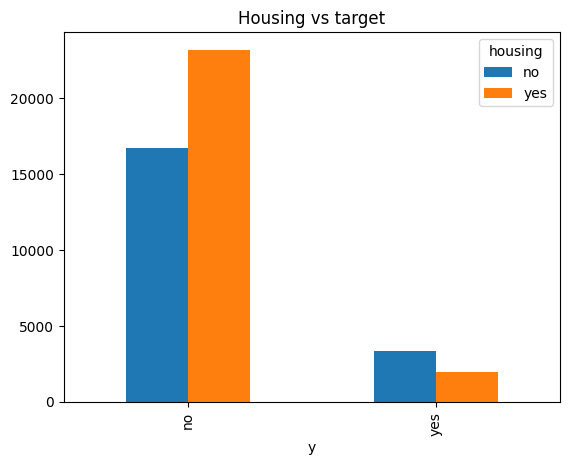

In [91]:
df.groupby(['y', 'housing'])['y'].count().unstack().plot(kind = 'bar')
plt.title('Housing vs target')
plt.show()


# INSIGHTS
# 1. Very interestingly those who dont have a housing have said yes more than those who have a housing 
# possibly due to unavailability of extra funds for a term deposit

# 2. Which also proves that, those who have said no majorly stem from those who have a housing again possibly
# indicating that they do not have enough funds to set aside

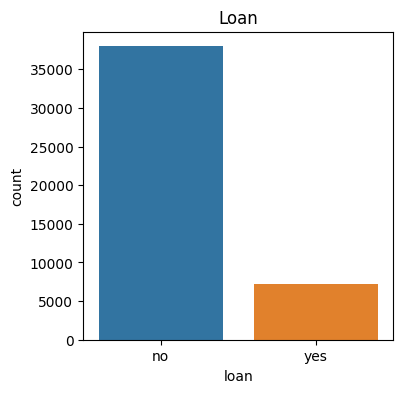

In [83]:
# LOAN COUNT AND TARGET DISTRIBUTION

plt.figure(figsize= (4,4))
sns.countplot(x = 'loan', data = df)
plt.title('Loan')
plt.show()


# INSIGHTS
# 1. Over 37000 customers have no loan 
# 2. Only 7244 customers have loan which points to only 16% of the total customers called

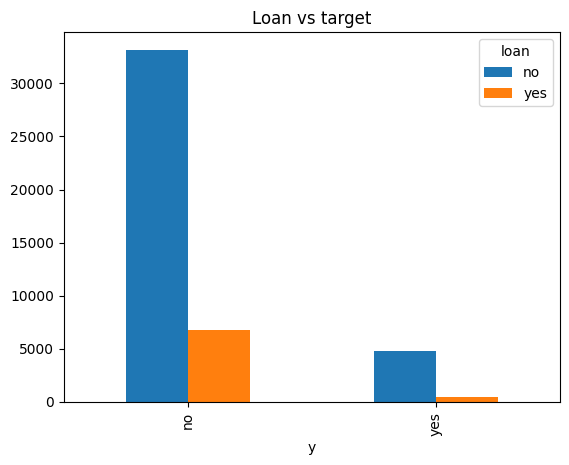

In [94]:
df.groupby(['y', 'loan'])['y'].count().unstack().plot(kind = 'bar')
plt.title('Loan vs target')
plt.show()

# INSIGHTS

# 1. The number of successful term deposits are higher in those who dont have loan vs those who havwe
# 2. The number of unsuccessful term deposits is also higher in those who dont have a loan

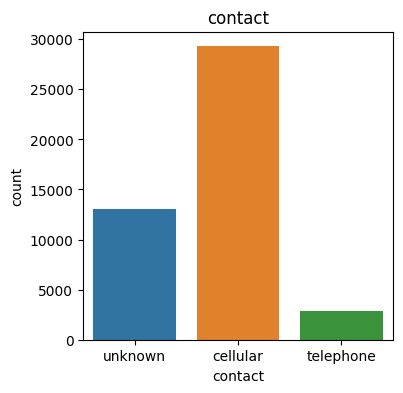

In [97]:
#CONTACT COUNT AND TARGET DISTRIBUTION

plt.figure(figsize= (4,4))
sns.countplot(x = 'contact', data = df)
plt.title('contact')
plt.show()


# INSIGHTS
# 1. Majority of potential customers were contacted via Cellphone
# 2. Second largest method is largely unknown
# 3. Third method has been the conventional telephone




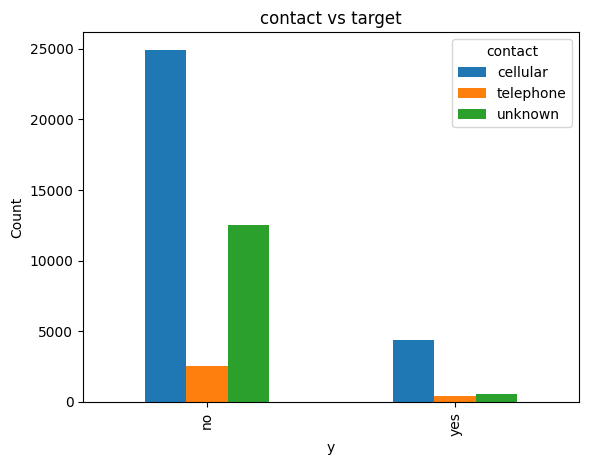

In [99]:
df.groupby(['y', 'contact'])['y'].count().unstack().plot(kind = 'bar')
plt.title('contact vs target')
plt.ylabel('Count')
plt.show()


# INSIGHTS

# 1. Most of the contact in both yes and no targets have been cellphone 
# 2. While the No category has unknown contact type randking second, in the Yes category both unknown and telephone seems
# to have equal distribution

In [100]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

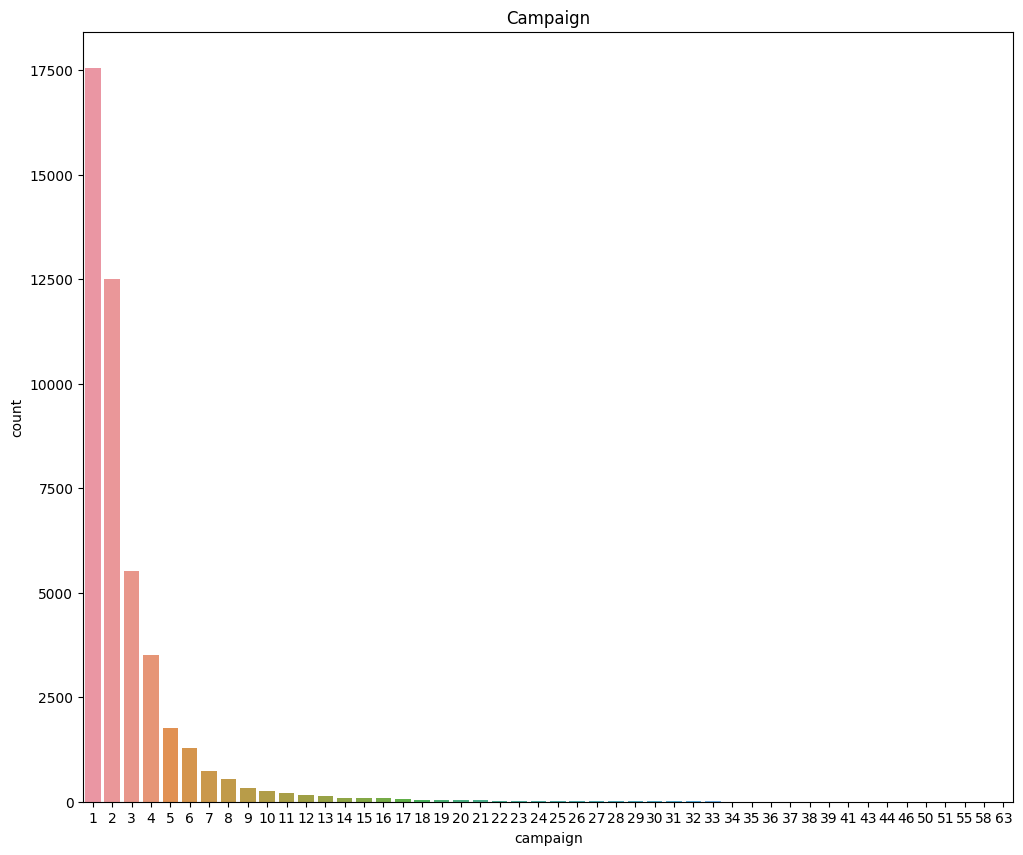

In [113]:

#CAMPAIGN COUNT AND TARGET DISTRIBUTION

plt.figure(figsize= (12,10))
sns.countplot(x = 'campaign', data = df)
plt.title('Campaign')
plt.show()


# Campaigns 1-6 have the most counts over 1000 while rest all of them have less than 1000 count

In [119]:
df.groupby(['y', 'campaign'])['y'].count().unstack()

campaign,1,2,3,4,5,6,7,8,9,10,...,39,41,43,44,46,50,51,55,58,63
y,,,,,,,,,,,,,,,,,,,,,
no,14983.0,11104.0,4903.0,3205.0,1625.0,1199.0,688.0,508.0,306.0,252.0,...,1.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
yes,2561.0,1401.0,618.0,317.0,139.0,92.0,47.0,32.0,21.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# The target and campaign again follows the same pattern of count with 1,2,3,4,5 having the highest counts in 
# yes and no

In [124]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

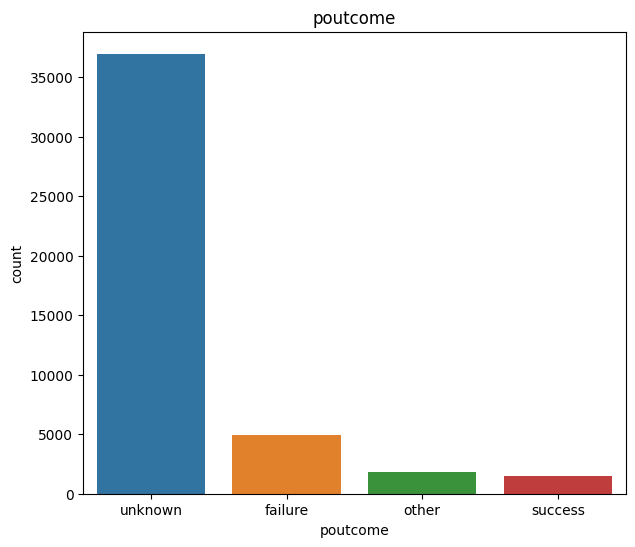

In [131]:

#Poutcome COUNT AND TARGET DISTRIBUTION

plt.figure(figsize= (7,6))
sns.countplot(x = 'poutcome', data = df)
plt.title('poutcome')
plt.show()


# 80% of the outcomes was unknowsn and the least category was in success of termdeposit
# The next largest category was failure

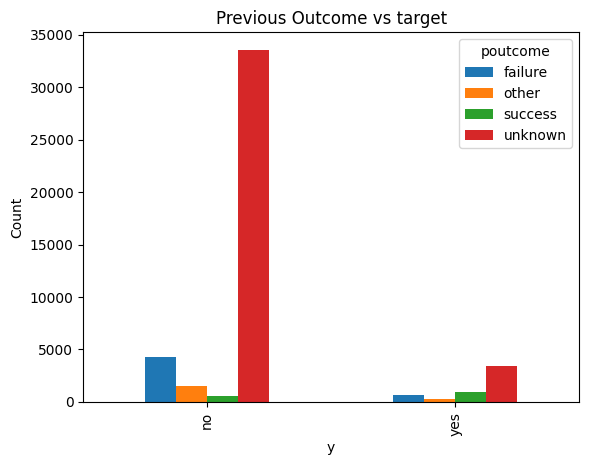

In [132]:
df.groupby(['y', 'poutcome'])['y'].count().unstack().plot(kind = 'bar')
plt.title('Previous Outcome vs target')
plt.ylabel('Count')
plt.show()

# Irrespective of whether the target was yes or no,  majority of previous outcome was unknown
# in both cases followed by failure only in No category

# Those who were successful in current campaign had more success rates in previous outcomes as well

# This indicates that the customers who opened a term deposit last time have a higher chance of 
# opening a new one 

In [133]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

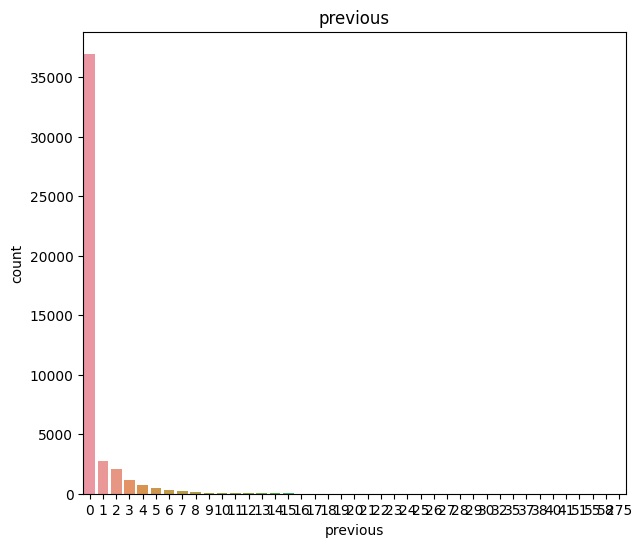

In [134]:
#Previous COUNT AND TARGET DISTRIBUTION

plt.figure(figsize= (7,6))
sns.countplot(x = 'previous', data = df)
plt.title('previous')
plt.show()


# 90% of customers were not contacted previously in any marketing campaigns
# About 5000 customers were contacted 1-3 times 
# Some customers have been contacted a lot of times highest being 245
# Quite a lot of customers have been repeatedly contacted upto 20 times as well

In [142]:
df.groupby(['y', 'previous'])['y'].count().unstack()


# This follows the same trend as count with the most number of customers never contacted 

previous,0,1,2,3,4,5,6,7,8,9,...,32,35,37,38,40,41,51,55,58,275
y,,,,,,,,,,,,,,,,,,,,,
no,33570.0,2189.0,1650.0,848.0,543.0,338.0,194.0,151.0,90.0,68.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,1.0
yes,3384.0,583.0,456.0,294.0,171.0,121.0,83.0,54.0,39.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN


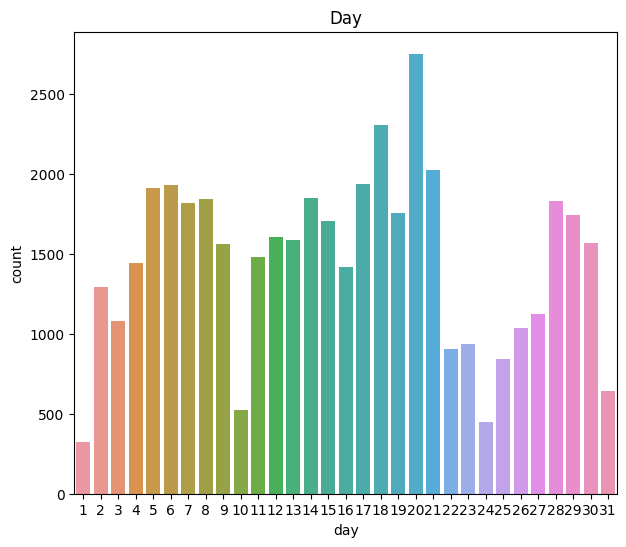

In [145]:
#Day of campagin COUNT AND TARGET DISTRIBUTION

plt.figure(figsize= (7,6))
sns.countplot(x = 'day', data = df)
plt.title('Day')
plt.show()

# Most number of people have been contacted on Day 20

In [149]:
df.groupby(['y', 'day'])['y'].count().unstack().T


# Most of the Term depoist ipeming have happened on Day 4, 18, 12, 13, 15 ad 30 

# So mid of the month and payday time work out very well for the term deposit yes
# Most number of failures also are in the beginning of the month up until 21 days 

y,no,yes
day,,
1,232,90
2,1111,182
3,901,178
4,1215,230
5,1695,215
6,1751,181
7,1660,157
8,1641,201
9,1382,179


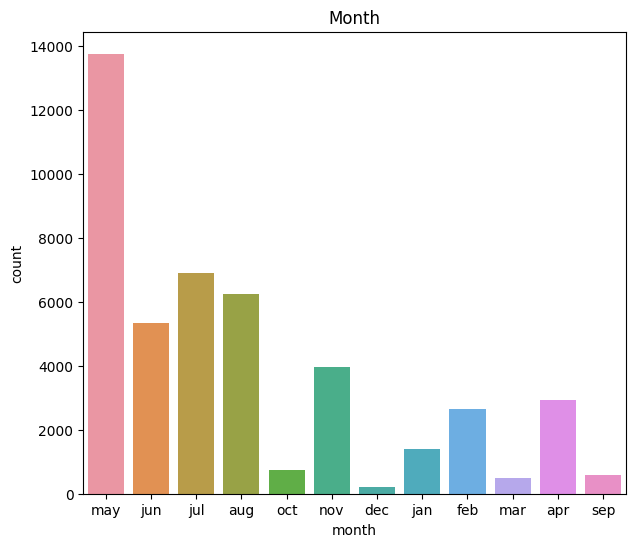

In [150]:
#Month of campagin COUNT AND TARGET DISTRIBUTION


plt.figure(figsize= (7,6))
sns.countplot(x = 'month', data = df)
plt.title('Month')
plt.show()

# May is the month when most campaigns were conducted
# The lowerst month was October, December, March and Septemer possibly owing to holidays
# The least was December

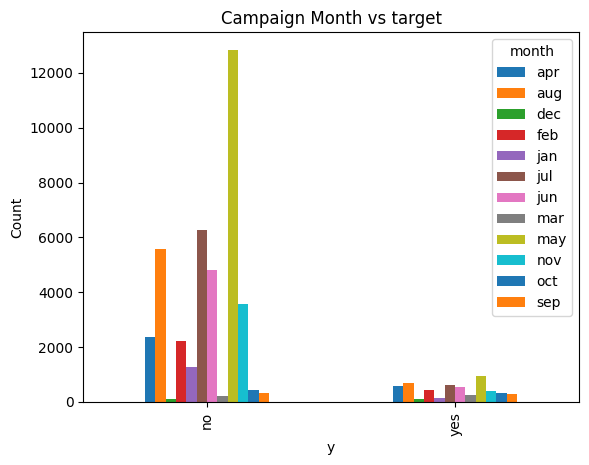

In [151]:
df.groupby(['y', 'month'])['y'].count().unstack().plot(kind = 'bar')
plt.title('Campaign Month vs target')
plt.ylabel('Count')
plt.show()

# May, Jun, July and August tend to be the highest count in both the Target yes and no

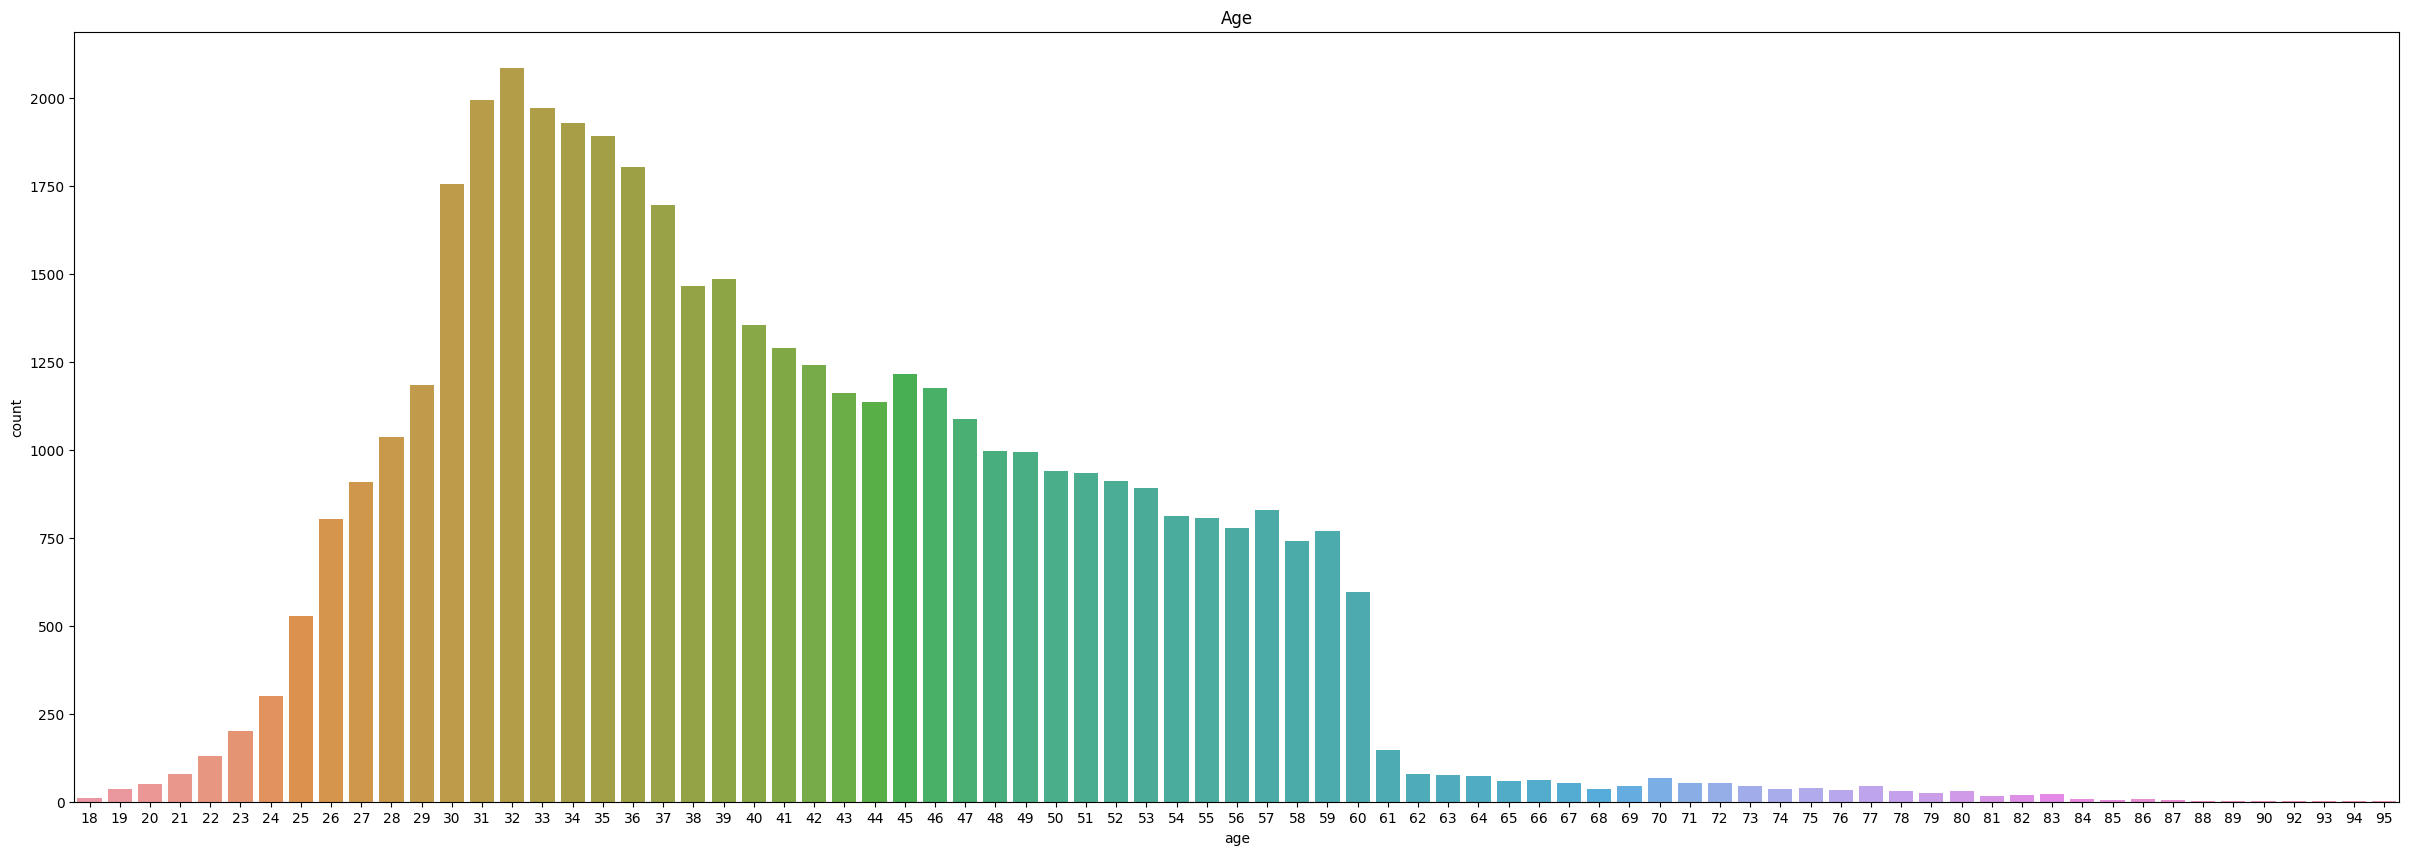

In [154]:
# AGE COUNT AND TARGET


plt.figure(figsize= (30,10))
sns.countplot(x = 'age', data = df)
plt.title('Age')
plt.show()


# The majority of customers targeted are betweeen the age of 25-60

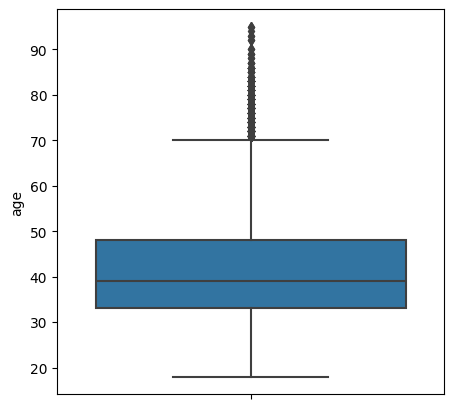

In [161]:
plt.figure(figsize= (5,5))
sns.boxplot(y = 'age', data = df)
plt.show()


# Lot of outliers in this data  The 50th percentile lies at around age 40

In [169]:
# DATA WRANGLING

# Converting categorical variables into numerical variables


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns = ['job','marital', 'education','default','housing', 'loan' ,'contact', 'month','poutcome']


for col in columns:
    df[col] = le.fit_transform(df[col])

In [172]:
df['y'] = le.fit_transform(df['y'])

# SPLITTING DATA

In [175]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 43)

In [ ]:
# STANDARDISATION OF DATA

In [179]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [186]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [194]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [188]:
accuracy_score(y_test, dt_pred)

0.8747097202255889

In [193]:
confusion_matrix(y_test, dt_pred)

array([[7349,  633],
       [ 500,  561]])

In [204]:
cf = classification_report(y_test, dt_pred)


print(cf)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7982
           1       0.47      0.53      0.50      1061

    accuracy                           0.87      9043
   macro avg       0.70      0.72      0.71      9043
weighted avg       0.88      0.87      0.88      9043



In [211]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [212]:
accuracy_score(y_test, rf_pred)

0.9074422205020458

In [213]:
confusion_matrix(y_test, rf_pred)

array([[7727,  255],
       [ 582,  479]])

In [214]:
cf = classification_report(y_test, rf_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7982
           1       0.65      0.45      0.53      1061

    accuracy                           0.91      9043
   macro avg       0.79      0.71      0.74      9043
weighted avg       0.90      0.91      0.90      9043



In [ ]:
# The Random forest Classififer gives better accuracy score and confusion matrix than Decison Tree Classifier
